In [ ]:
import pandas as pd

df = pd.read_csv('titles.csv')

df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [ ]:
df.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [ ]:
df_filtered = df.drop(['tmdb_score','tmdb_popularity','imdb_id','imdb_votes','age_certification'],axis =1)

In [ ]:
df_filtered['seasons'].fillna(0,inplace = True)

In [ ]:
df_filtered.isnull().sum()

id                        0
title                     1
type                      0
description              18
release_year              0
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_score              482
dtype: int64

In [ ]:
df_filtered.dropna(inplace = True)

<Axes: >

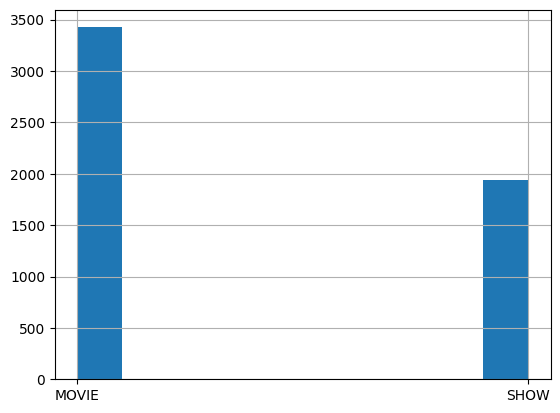

In [ ]:
df_filtered['type'].hist()

In [ ]:
import ast

df_filtered['genres'] = df_filtered['genres'].apply(ast.literal_eval)
df_filtered['production_countries'] = df_filtered['production_countries'].apply(ast.literal_eval)

movie_df = df_filtered[df_filtered['type'] == 'MOVIE']
tv_df = df_filtered[df_filtered['type'] == 'SHOW']

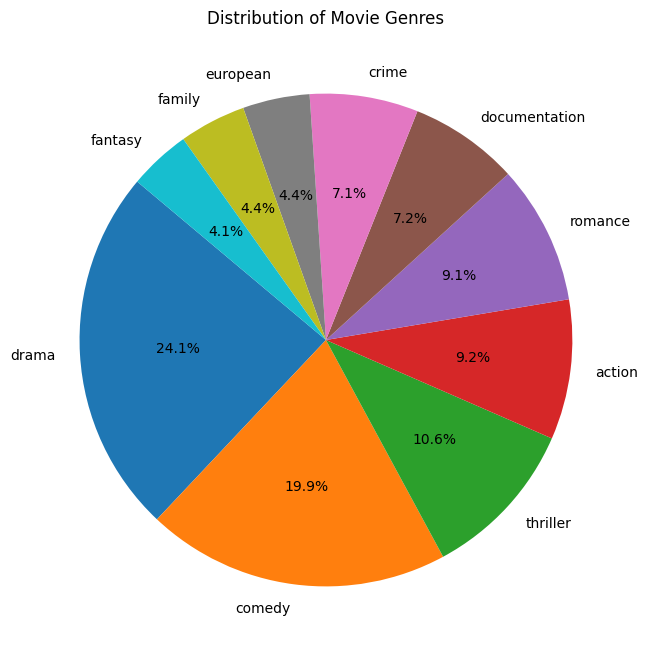

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Initialize an empty list to collect all genres
all_genres = []

# Iterate over each row and extend the all_genres list with the genres of each row
for genres in movie_df['genres']:
    all_genres.extend(list(genres))

# Use Counter to count the occurrences of each genre
genre_counts = Counter(all_genres).most_common(10)
genre_counts = Counter(dict(genre_counts))

# Convert the Counter object to a pandas Series for easier plotting
genre_counts_series = pd.Series(genre_counts)

# Plot the counts using a pie chart
plt.figure(figsize=(8, 8))
genre_counts_series.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.ylabel('')
plt.title('Distribution of Movie Genres')
plt.show()


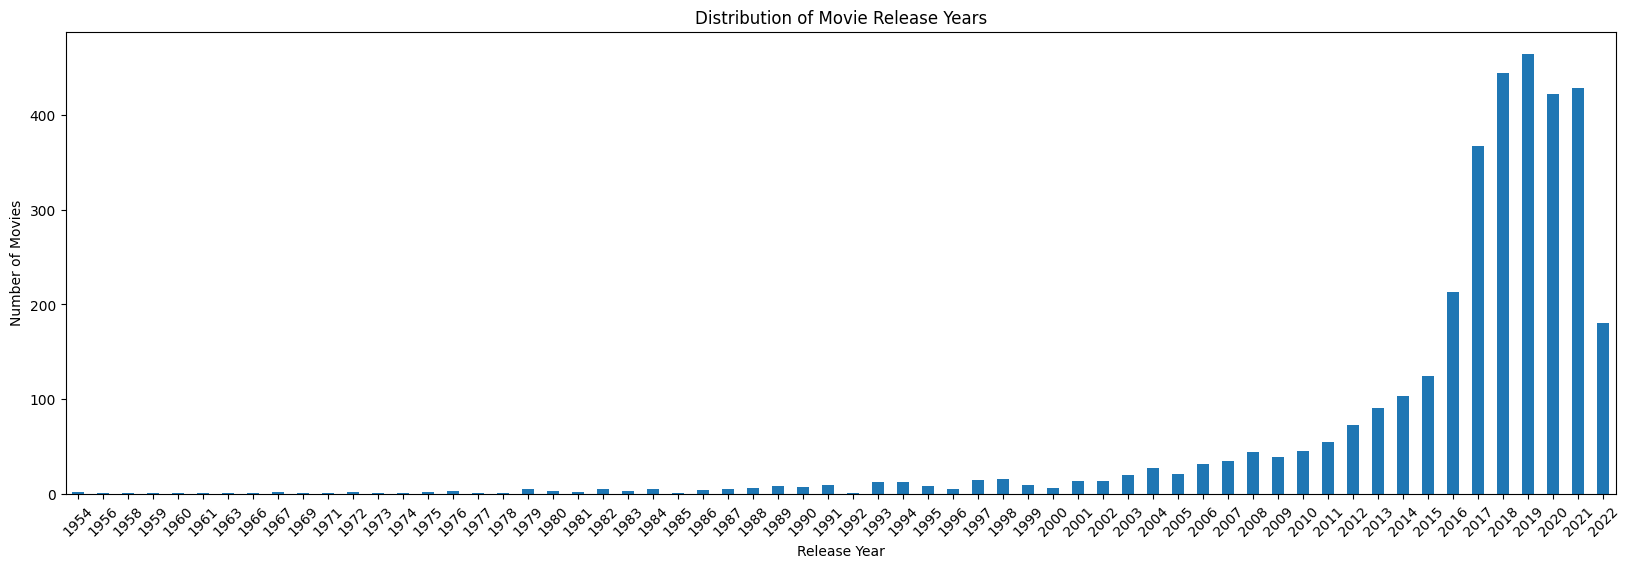

In [ ]:
# Count the occurrences of each year
year_counts = movie_df['release_year'].value_counts().sort_index()

# Plot the counts using a bar plot
plt.figure(figsize=(20, 6))
year_counts.plot(kind='bar')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Release Years')
plt.xticks(rotation=45)
plt.show()

<ipython-input-13-e2f95bf571db>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['runtime_binned'] = pd.cut(movie_df['runtime'], bins=bins, labels=labels, right=False)


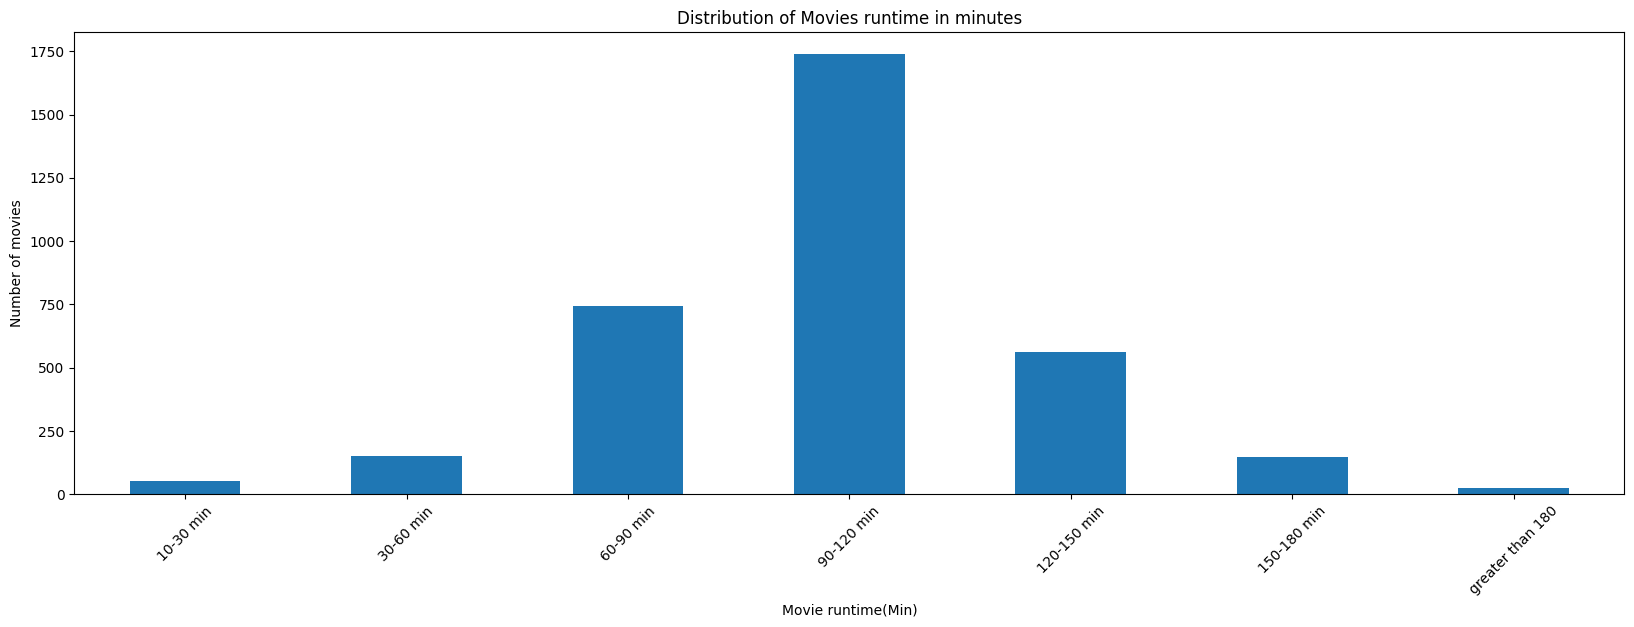

In [ ]:
# Define the bins and labels
bins = [0, 30, 60, 90, 120, 150, 180, float('inf')]
labels = ['10-30 min', '30-60 min', '60-90 min', '90-120 min', '120-150 min', '150-180 min', 'greater than 180']

# Create the binned column
movie_df['runtime_binned'] = pd.cut(movie_df['runtime'], bins=bins, labels=labels, right=False)
# Count the occurrences of each year
year_counts = movie_df['runtime_binned'].value_counts().sort_index()

# Plot the counts using a bar plot
plt.figure(figsize=(20, 6))
year_counts.plot(kind='bar')
plt.xlabel('Movie runtime(Min)')
plt.ylabel('Number of movies')
plt.title('Distribution of Movies runtime in minutes')
plt.xticks(rotation=45)
plt.show()

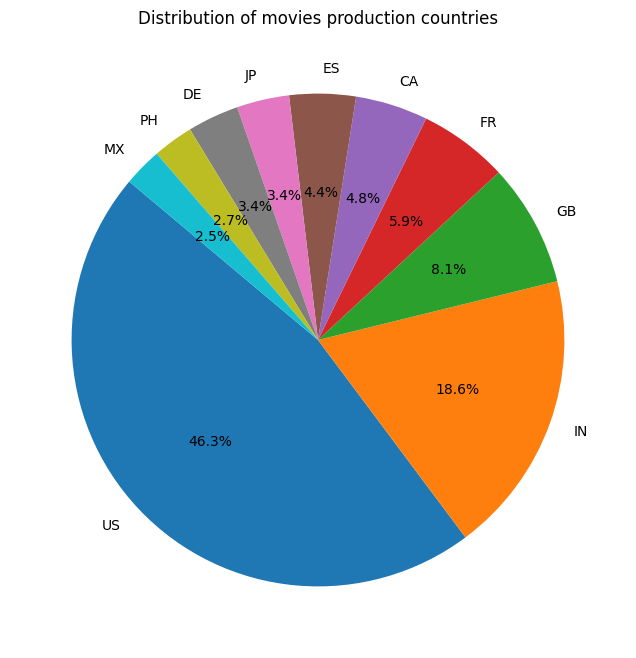

In [ ]:
# Initialize an empty list to collect all genres
all_genres = []

# Iterate over each row and extend the all_genres list with the genres of each row
for genres in movie_df['production_countries']:
    all_genres.extend(list(genres))

# Use Counter to count the occurrences of each genre
genre_counts = Counter(all_genres).most_common(10)
genre_counts = Counter(dict(genre_counts))
# Convert the Counter object to a pandas Series for easier plotting
genre_counts_series = pd.Series(genre_counts)

# Plot the counts using a pie chart
plt.figure(figsize=(8, 8))
genre_counts_series.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.ylabel('')
plt.title('Distribution of movies production countries')
plt.show()


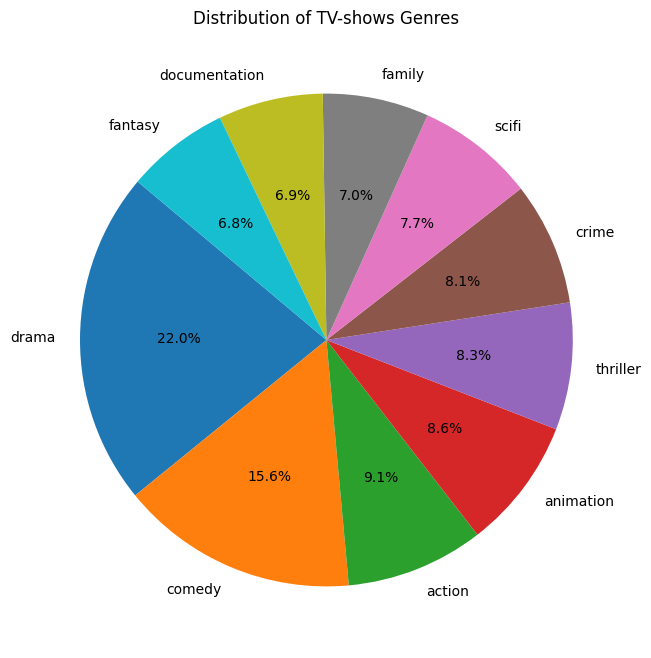

In [ ]:
# Initialize an empty list to collect all genres
all_genres = []

# Iterate over each row and extend the all_genres list with the genres of each row
for genres in tv_df['genres']:
    all_genres.extend(list(genres))

# Use Counter to count the occurrences of each genre
genre_counts = Counter(all_genres).most_common(10)
genre_counts = Counter(dict(genre_counts))

# Convert the Counter object to a pandas Series for easier plotting
genre_counts_series = pd.Series(genre_counts)

# Plot the counts using a pie chart
plt.figure(figsize=(8, 8))
genre_counts_series.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.ylabel('')
plt.title('Distribution of TV-shows Genres')
plt.show()

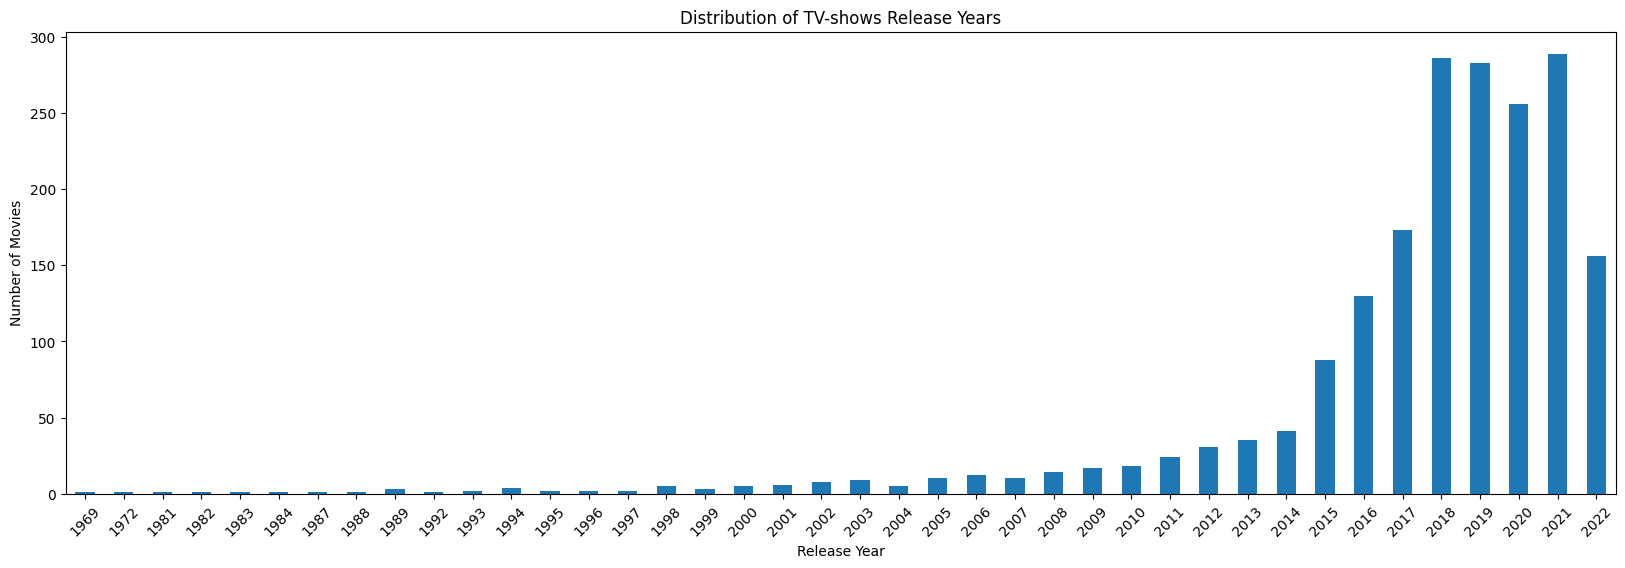

In [ ]:
# Count the occurrences of each year
year_counts = tv_df['release_year'].value_counts().sort_index()

# Plot the counts using a bar plot
plt.figure(figsize=(20, 6))
year_counts.plot(kind='bar')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of TV-shows Release Years')
plt.xticks(rotation=45)
plt.show()

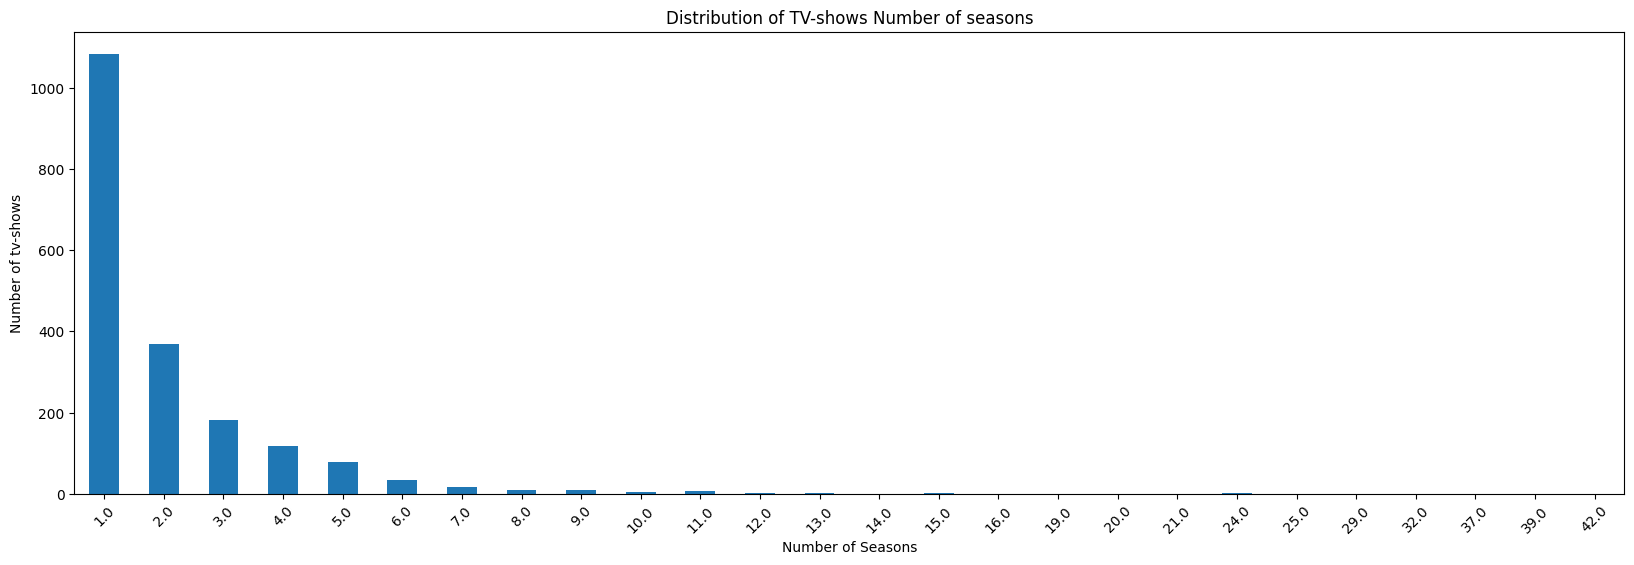

In [ ]:
# Count the occurrences of each year
year_counts = tv_df['seasons'].value_counts().sort_index()

# Plot the counts using a bar plot
plt.figure(figsize=(20, 6))
year_counts.plot(kind='bar')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of tv-shows')
plt.title('Distribution of TV-shows Number of seasons')
plt.xticks(rotation=45)
plt.show()

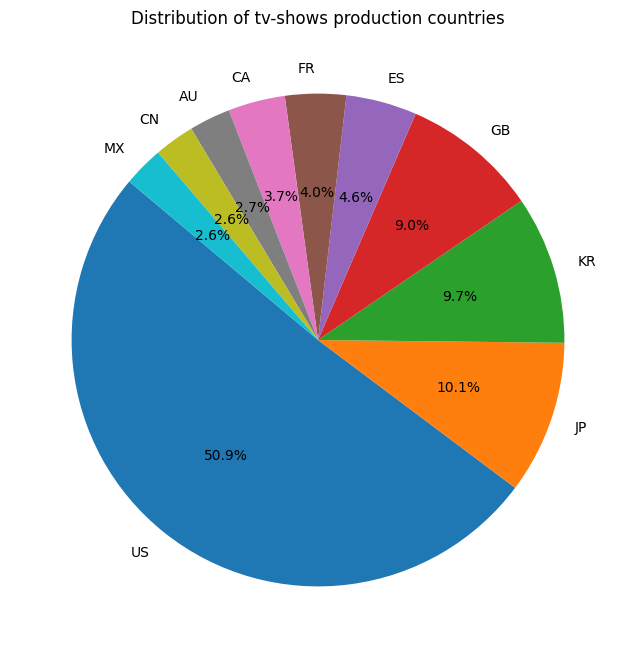

In [ ]:
# Initialize an empty list to collect all genres
all_genres = []

# Iterate over each row and extend the all_genres list with the genres of each row
for genres in tv_df['production_countries']:
    all_genres.extend(list(genres))

# Use Counter to count the occurrences of each genre
genre_counts = Counter(all_genres).most_common(10)
genre_counts = Counter(dict(genre_counts))
# Convert the Counter object to a pandas Series for easier plotting
genre_counts_series = pd.Series(genre_counts)

# Plot the counts using a pie chart
plt.figure(figsize=(8, 8))
genre_counts_series.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.ylabel('')
plt.title('Distribution of tv-shows production countries')
plt.show()

Create a prompt to contain all the data about the movie/tv-show

In [ ]:
movie_df.columns

Index(['id', 'title', 'type', 'description', 'release_year', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_score',
       'runtime_binned'],
      dtype='object')

In [ ]:
movies_prompt = []
movies_info = []

for index, row in movie_df.iterrows():
  curr_dict = {}
  curr_prompt = ""
  curr_prompt += "Title: " + row['title'] + "\n"
  curr_prompt += "Release Year: " + str(row['release_year']) + "\n"
  curr_prompt += "Runtime: " + str(row['runtime']) + "\n"
  genre = ""
  for i in row['genres']:
    genre += i + ", "
  genre = genre[:-2]
  genre += '.'
  curr_prompt += "Genres: " + genre + "\n"
  curr_prompt += "Description: " + str(row['description']) + "\n"
  prod_countries = ""
  for i in row['production_countries']:
    prod_countries += i + ", "
  prod_countries = prod_countries[:-2]
  prod_countries += '.'
  curr_prompt += "Production Countries: " + prod_countries + "\n"
  curr_prompt += "IMDB score: " + str(row['imdb_score']) + "\n"

  curr_dict['title'] = row['title']
  curr_dict['description'] = row['description']
  curr_dict['production_countries'] = row['production_countries']
  curr_dict['genres'] = row['genres']
  curr_dict['type'] = 'Movie'

  movies_prompt.append(curr_prompt)
  movies_info.append(curr_dict)

In [ ]:
print(movies_prompt[0])

Title: Taxi Driver
Release Year: 1976
Runtime: 114
Genres: drama, crime.
Description: A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action.
Production Countries: US.
IMDB score: 8.2



In [ ]:
tv_prompt = []
tv_info = []

for index, row in tv_df.iterrows():
  curr_dict = {}
  curr_prompt = ""
  curr_prompt += "Title: " + row['title'] + "\n"
  curr_prompt += "Release Year: " + str(row['release_year']) + "\n"
  genre = ""
  for i in row['genres']:
    genre += i + ", "
  genre = genre[:-2]
  genre += '.'
  curr_prompt += "Genres: " + genre + "\n"
  curr_prompt += "Description: " + str(row['description']) + "\n"
  curr_prompt += "Seasons: " + str(int(row['seasons'])) + "\n"
  prod_countries = ""
  for i in row['production_countries']:
    prod_countries += i + ", "
  prod_countries = prod_countries[:-2]
  prod_countries += '.'
  curr_prompt += "Production Countries: " + prod_countries + "\n"
  curr_prompt += "IMDB score: " + str(row['imdb_score']) + "\n"

  curr_dict['title'] = row['title']
  curr_dict['description'] = row['description']
  curr_dict['production_countries'] = row['production_countries']
  curr_dict['genres'] = row['genres']
  curr_dict['type'] = 'TV-Show'

  tv_prompt.append(curr_prompt)
  tv_info.append(curr_dict)

In [ ]:
print(tv_prompt[0])

Title: Monty Python's Flying Circus
Release Year: 1969
Genres: comedy, european.
Description: A British sketch comedy series with the shows being composed of surreality, risqué or innuendo-laden humour, sight gags and observational sketches without punchlines.
Seasons: 4
Production Countries: GB.
IMDB score: 8.8



In [ ]:
pip install transformers sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Load pre-trained model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Create embeddings for the data
tv_embeddings = model.encode(tv_prompt, convert_to_tensor=True)
movie_embeddings = model.encode(movies_prompt, convert_to_tensor=True)

# Query
query_tv = "A British comedy series with sketches and observational humour"
query_movie = 'A action movie about world war 2 and Japan and US conflict'

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
def semantic_search(index, embeddings, query, model, k):
  query_embedding = model.encode(query, convert_to_tensor=True)

  # Compute cosine similarities
  cosine_scores = util.pytorch_cos_sim(query_embedding, embeddings)[0]

  # Get the top 5 results
  top_results = np.argpartition(-cosine_scores, range(k))[:k]

  # Display the results
  for idx in top_results:
      print(f"Score: {cosine_scores[idx]:.4f}")
      print(index[idx])
      print()

In [ ]:
semantic_search(movies_prompt, movie_embeddings, query_movie, model, 5)

Score: 0.5071
Title: Mobile Suit Gundam II: Soldiers of Sorrow
Release Year: 1981
Runtime: 133
Genres: animation, scifi, action, drama, war.
Description: After managing to survive attacks by Zeon's Char Aznable and Garma Zabi, the crew of Federation warship White Base and its mobile suits must battle Zeon forces through Asia, Europe, and the Atlantic Ocean if they are to reach Earth Federation's headquarters alive. During that process many of its crewmembers must overcome their fears, losses, immaturities, and insecurities in order to survive.
Production Countries: JP.
IMDB score: 7.2


Score: 0.5048
Title: Mudbound
Release Year: 2017
Runtime: 135
Genres: drama, war.
Description: In the post–World War II South, two families are pitted against a barbaric social hierarchy and an unrelenting landscape as they simultaneously fight the battle at home and the battle abroad.
Production Countries: US.
IMDB score: 7.4


Score: 0.5008
Title: Major
Release Year: 2022
Runtime: 149
Genres: action, 

In [ ]:
semantic_search(tv_prompt, tv_embeddings, query_tv, model, 10)

Score: 0.6599
Title: Monty Python's Flying Circus
Release Year: 1969
Genres: comedy, european.
Description: A British sketch comedy series with the shows being composed of surreality, risqué or innuendo-laden humour, sight gags and observational sketches without punchlines.
Seasons: 4
Production Countries: GB.
IMDB score: 8.8


Score: 0.5962
Title: The Windsors
Release Year: 2016
Genres: comedy.
Description: Comedy soap opera re-imagining the lives of the British Royal Family as you have never seen them before.
Seasons: 3
Production Countries: GB.
IMDB score: 7.1


Score: 0.5641
Title: Can You Hear Me?
Release Year: 2019
Genres: comedy, drama.
Description: Three friends in a low-income neighborhood find humor and hope in their lives as they grapple with bad boyfriends and their dysfunctional families.
Seasons: 3
Production Countries: CA.
IMDB score: 7.6


Score: 0.5570
Title: Still Game
Release Year: 2002
Genres: comedy, european.
Description: Cult Scottish comedy about the lives of tw

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.manifold import TSNE

# Create a DataFrame
movie_info_df = pd.DataFrame(movies_info)
tv_info_df = pd.DataFrame(tv_info)
df_all = pd.concat([movie_info_df, tv_info_df])

# Create embeddings for the data
descriptions = df_all['description'].tolist()
desc_embeddings = model.encode(descriptions, convert_to_tensor=True)

# Perform PCA to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(desc_embeddings)



In [ ]:
# Add reduced dimensions to the DataFrame
df_all['dim1'] = reduced_embeddings[:, 0]
df_all['dim2'] = reduced_embeddings[:, 1]

In [ ]:
def plot_2d(df, by='genres'):
  fig = px.scatter(df, x='dim1', y='dim2', color=by, hover_data=['title'], title="Movies and Tv-Shows Embeddings in 2D Space")

  fig.show()


In [ ]:
plot_2d(df_all, 'type')

In [ ]:
def get_single_genre(genres):
  if len(genres) > 0:
    return genres[0]
  else:
    return 'None'

df_all['genres'] = df_all['genres'].apply(lambda x: get_single_genre(x))

In [ ]:
df_all

,title,description,production_countries,genres,type,dim1,dim2
0,Taxi Driver,A mentally unstable Vietnam War veteran works ...,[US],drama,Movie,7.517832,-24.740690
1,Deliverance,Intent on seeing the Cahulawassee River before...,[US],drama,Movie,7.524780,31.952898
2,Monty Python and the Holy Grail,"King Arthur, accompanied by his squire, recrui...",[GB],fantasy,Movie,20.240499,-0.889441
3,The Dirty Dozen,12 American military prisoners in World War II...,"[GB, US]",war,Movie,20.045210,-14.392042
4,Life of Brian,"Brian Cohen is an average young Jewish man, bu...",[GB],comedy,Movie,11.831316,6.784433
...,...,...,...,...,...,...,...
1933,Lava Ka Dhaava,Actor Jaaved Jaafferi brings his signature hum...,[IO],reality,TV-Show,34.179722,16.700577
1934,The Family That Sings Together: The Camargos,"Surrounded by family and friends, Zezé Di Cama...",[BR],documentation,TV-Show,-10.219849,7.147960
1935,Let's Eat,A food-blogging insurance agent encounters a f...,[TH],drama,TV-Show,-28.636732,-10.460869
1936,Pitta Kathalu,"Four different women, four journeys of love an...",[IN],drama,TV-Show,-45.781384,-13.846732


In [ ]:
plot_2d(df_all, 'genres')

In [ ]:
df_all['production_countries'] = df_all['production_countries'].apply(lambda x: get_single_genre(x))

In [ ]:
plot_2d(df_all, 'production_countries')

In [ ]:
df_filt = df_all[df_all['production_countries'] != 'None']

In [ ]:
df_all

,title,description,production_countries,genres,type,dim1,dim2
0,Taxi Driver,A mentally unstable Vietnam War veteran works ...,US,drama,Movie,7.517832,-24.740690
1,Deliverance,Intent on seeing the Cahulawassee River before...,US,drama,Movie,7.524780,31.952898
2,Monty Python and the Holy Grail,"King Arthur, accompanied by his squire, recrui...",GB,fantasy,Movie,20.240499,-0.889441
3,The Dirty Dozen,12 American military prisoners in World War II...,GB,war,Movie,20.045210,-14.392042
4,Life of Brian,"Brian Cohen is an average young Jewish man, bu...",GB,comedy,Movie,11.831316,6.784433
...,...,...,...,...,...,...,...
1933,Lava Ka Dhaava,Actor Jaaved Jaafferi brings his signature hum...,IO,reality,TV-Show,34.179722,16.700577
1934,The Family That Sings Together: The Camargos,"Surrounded by family and friends, Zezé Di Cama...",BR,documentation,TV-Show,-10.219849,7.147960
1935,Let's Eat,A food-blogging insurance agent encounters a f...,TH,drama,TV-Show,-28.636732,-10.460869
1936,Pitta Kathalu,"Four different women, four journeys of love an...",IN,drama,TV-Show,-45.781384,-13.846732


In [ ]:
plot_2d(df_filt, 'production_countries')

In [ ]:
df_filt = df_all[df_all['genres'] != 'None']
plot_2d(df_filt, 'genres')

# LLM text classification - classify a movie\tvshow description to a genre by fine-tuning Bert

In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.

In [ ]:
pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 5.3 MB/s eta 0:00:00


In [ ]:
pip install transformers[torch]

In [ ]:
pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.7 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Train-test split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_all['description'].tolist(),
    df_all['genres'].tolist(),
    test_size=0.25,
    random_state=42
)

# Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
val_labels = label_encoder.transform(val_labels)
num_labels = len(label_encoder.classes_)

import evaluate
accuracy = evaluate.load('accuracy')

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

# Tokenize data
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)

# Create datasets
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels
})
val_dataset = Dataset.from_dict({
    'input_ids': val_encodings['input_ids'],
    'attention_mask': val_encodings['attention_mask'],
    'labels': val_labels
})

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    learning_rate=1e-3,
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    logging_dir='./logs',
    load_best_model_at_end=True
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,2.289894,0.228934
2,2.373700,2.274841,0.261745
3,2.373700,2.258653,0.261745


TrainOutput(global_step=756, training_loss=2.353471221116485, metrics={'train_runtime': 831.2593, 'train_samples_per_second': 14.515, 'train_steps_per_second': 0.909, 'total_flos': 2300767055835948.0, 'train_loss': 2.353471221116485, 'epoch': 3.0})

In [ ]:
# Evaluate the model
results = trainer.evaluate()
print(results)


{'eval_loss': 2.258652925491333, 'eval_accuracy': 0.26174496644295303, 'eval_runtime': 20.362, 'eval_samples_per_second': 65.858, 'eval_steps_per_second': 4.125, 'epoch': 3.0}


In [ ]:
def predict_genre(description):
    # Ensure model is on the same device as the input
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)  # Move model to GPU if available

    inputs = tokenizer(description, return_tensors='pt', truncation=True, padding=True, max_length=512).to(device) # Move input tensors to the same device
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_label = torch.argmax(logits, dim=1).item()
    return label_encoder.inverse_transform([predicted_label])[0]

# Example usage
new_description = "A young boy discovers he has magical powers and attends a school for wizards with his amazing dog."
predicted_genre = predict_genre(new_description)
print(f"Predicted genre: {predicted_genre}")

Predicted genre: drama


In [ ]:
df_all['genres'].value_counts()

genres
drama            1323
comedy           1228
documentation     578
thriller          357
action            340
animation         271
scifi             227
crime             226
romance           223
reality           162
horror            107
family            102
fantasy            80
music              50
war                44
history            21
western            15
None                5
sport               4
Name: count, dtype: int64

In [ ]:
# drama = drama + romance
# comedy = comedy
# action = action, thriller, crime, war, horror
# scify = scify, fantasy
# family = family, sport, music, reality, animation, documentation, history

genre_mapping = {
    'drama': ['drama', 'romance'],
    'comedy': ['comedy'],
    'action': ['action', 'thriller', 'crime', 'war', 'horror'],
    'scifi': ['scifi', 'fantasy'],
    'family': ['family', 'sport', 'music', 'reality', 'animation', 'documentation', 'history']
}


def map_genre(genre):
    for new_genre, old_genres in genre_mapping.items():
        if genre.lower() in old_genres:
            return new_genre
    return genre  # If genre does not match any key, return the original genre

# Apply the mapping function to the 'genre' column
df_all['mapped_genres'] = df_all['genres'].apply(map_genre)

In [ ]:
df_all['mapped_genres'].value_counts()

keep = ['drama', 'comedy', 'action', 'scifi', 'family']
df_all = df_all[df_all['mapped_genres'].isin(keep)]

In [ ]:
df_all['mapped_genres'].value_counts()

mapped_genres
drama     1546
comedy    1228
family    1188
action    1074
scifi      307
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Train-test split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_all['description'].tolist(),
    df_all['mapped_genres'].tolist(),
    test_size=0.05,
    random_state=42
)

# Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
val_labels = label_encoder.transform(val_labels)
num_labels = len(label_encoder.classes_)

import evaluate
accuracy = evaluate.load('accuracy')

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

# Tokenize data
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)

# Create datasets
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels
})
val_dataset = Dataset.from_dict({
    'input_ids': val_encodings['input_ids'],
    'attention_mask': val_encodings['attention_mask'],
    'labels': val_labels
})

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    learning_rate=1e-3,
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    logging_dir='./logs',
    load_best_model_at_end=True
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,1.658400,1.561710,0.313433
2,1.605200,1.561119,0.313433
3,1.600400,1.541056,0.313433
4,1.565800,1.528723,0.171642
5,1.540400,1.507439,0.313433


TrainOutput(global_step=3175, training_loss=1.5878711610328493, metrics={'train_runtime': 1812.8445, 'train_samples_per_second': 13.997, 'train_steps_per_second': 1.751, 'total_flos': 4837943521335750.0, 'train_loss': 1.5878711610328493, 'epoch': 5.0})

In [ ]:
# Evaluate the model
results = trainer.evaluate()
print(results)

{'eval_loss': 1.507439374923706, 'eval_accuracy': 0.31343283582089554, 'eval_runtime': 3.2264, 'eval_samples_per_second': 83.064, 'eval_steps_per_second': 10.538, 'epoch': 5.0}


In [ ]:
def predict_genre(description):
    # Ensure model is on the same device as the input
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)  # Move model to GPU if available

    inputs = tokenizer(description, return_tensors='pt', truncation=True, padding=True, max_length=512).to(device) # Move input tensors to the same device
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_label = torch.argmax(logits, dim=1).item()
    return label_encoder.inverse_transform([predicted_label])[0]

# Example usage
# new_description = "A young boy discovers he has magical powers and attends a school for wizards with his dark animel."
new_description = "A young man joins the police and fights the criminals that escaped the jail."

predicted_genre = predict_genre(new_description)
print(f"Predicted genre: {predicted_genre}")

Predicted genre: drama


In [ ]:
from transformers import pipeline

classifier = pipeline('zero-shot-classification')

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning:

`resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.



config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
new_description = [
  "A young boy discovers he has magical powers and attends a school for wizards.",
  "A young man joins the police and fights the criminals that escaped the jail.",
  "A ungraduated boy goes on wild expeirence with his colleges friends in las vegas when thing go not as expected.",
  "A familiy of two parents and 3 children finds a dog in the street and raise him to what will become and amazing story about loailty and family"
]
res = classifier(new_description, candidate_labels=['drama', 'comedy', 'action', 'scifi', 'family'])

for r in res:
  print(f'Description: {r["sequence"]}')
  for i in range(len(r['labels'])):
    print(f'Label: {r["labels"][i]} - Score: {r["scores"][i]}')
  print()


Description: A young boy discovers he has magical powers and attends a school for wizards.
Label: action - Score: 0.41731342673301697
Label: scifi - Score: 0.3849131762981415
Label: drama - Score: 0.15255598723888397
Label: comedy - Score: 0.022826554253697395
Label: family - Score: 0.02239084430038929

Description: A young man joins the police and fights the criminals that escaped the jail.
Label: action - Score: 0.8542247414588928
Label: drama - Score: 0.11596250534057617
Label: scifi - Score: 0.017061257734894753
Label: comedy - Score: 0.007644393481314182
Label: family - Score: 0.005107106640934944

Description: A ungraduated boy goes on wild expeirence with his colleges friends in las vegas when thing go not as expected.
Label: action - Score: 0.6695591807365417
Label: drama - Score: 0.24937385320663452
Label: comedy - Score: 0.05485708639025688
Label: scifi - Score: 0.016757525503635406
Label: family - Score: 0.00945228524506092

Description: A familiy of two parents and 3 childr